<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(2_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_2.8'

In [5]:
os.listdir(base_path)

['data_add_delta_2.8_n250.csv',
 'data_add_delta_2.8_n120.csv',
 'data_add_delta_2.8_n60.csv',
 'data_add_delta_2.8_n30.csv',
 'data_add_delta_2.8_n20.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,74.183067,48.016909,-173.978558,-41.778582,161.713330,-203.491913
1,0.0,1.0,21.548764,55.201187,293.988732,380.738683,70.804853,309.933830
2,0.0,2.0,38.688644,21.244755,-90.302601,-20.369202,47.432831,-67.802033
3,0.0,3.0,49.308772,38.037790,59.950670,157.297232,96.341911,60.955320
4,0.0,4.0,82.545388,80.704838,242.435994,415.686219,232.839003,182.847217
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.173483,23.669606,-103.827471,-17.984382,88.263690,-106.248073
249996,999.0,246.0,38.608996,30.449766,-71.332014,7.726748,72.906557,-65.179809
249997,999.0,247.0,56.356453,77.352025,-70.496704,73.211774,110.242092,-37.030318
249998,999.0,248.0,79.091488,92.898594,-715.941394,-533.951312,144.301293,-678.252605


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,74.183067,48.016909,-173.978558,-41.778582,161.713330,-203.491913
1,0.0,1.0,21.548764,55.201187,293.988732,380.738683,70.804853,309.933830
2,0.0,2.0,38.688644,21.244755,-90.302601,-20.369202,47.432831,-67.802033
3,0.0,3.0,49.308772,38.037790,59.950670,157.297232,96.341911,60.955320
4,0.0,4.0,82.545388,80.704838,242.435994,415.686219,232.839003,182.847217
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.173483,23.669606,-103.827471,-17.984382,88.263690,-106.248073
249996,999.0,246.0,38.608996,30.449766,-71.332014,7.726748,72.906557,-65.179809
249997,999.0,247.0,56.356453,77.352025,-70.496704,73.211774,110.242092,-37.030318
249998,999.0,248.0,79.091488,92.898594,-715.941394,-533.951312,144.301293,-678.252605


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    74.183067  48.016909 -173.978558  -41.778582  161.713330   
      1.0    21.548764  55.201187  293.988732  380.738683   70.804853   
      2.0    38.688644  21.244755  -90.302601  -20.369202   47.432831   
      3.0    49.308772  38.037790   59.950670  157.297232   96.341911   
      4.0    82.545388  80.704838  242.435994  415.686219  232.839003   
...                ...        ...         ...         ...         ...   
999.0 245.0  52.173483  23.669606 -103.827471  -17.984382   88.263690   
      246.0  38.608996  30.449766  -71.332014    7.726748   72.906557   
      247.0  56.356453  77.352025  -70.496704   73.211774  110.242092   
      248.0  79.091488  92.898594 -715.941394 -533.951312  144.301293   
      249.0  37.834640  78.242027  115.104602  241.181269   86.685453   

                  e_hat  
rep   index              
0.0   0.0   -203.491913  
      1.0    309.933830  
      2.0    -67.802033  
      3.0     60.955320  
      4.0    182.847217  
...                 ...  
999.0 245.0 -106.248073  
      246.0  -65.179809  
      247.0  -37.030318  
      248.0 -678.252605  
      249.0  154.495816  

[250000 rows x 6 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    74.183067  48.016909 -173.978558  -41.778582  161.713330   
      1.0    21.548764  55.201187  293.988732  380.738683   70.804853   
      2.0    38.688644  21.244755  -90.302601  -20.369202   47.432831   
      3.0    49.308772  38.037790   59.950670  157.297232   96.341911   
      4.0    82.545388  80.704838  242.435994  415.686219  232.839003   
...                ...        ...         ...         ...         ...   
999.0 245.0  52.173483  23.669606 -103.827471  -17.984382   88.263690   
      246.0  38.608996  30.449766  -71.332014    7.726748   72.906557   
      247.0  56.356453  77.352025  -70.496704   73.211774  110.242092   
      248.0  79.091488  92.898594 -715.941394 -533.951312  144.301293   
      249.0  37.834640  78.242027  115.104602  241.181269   86.685453   

                  e_hat  
rep   index              
0.0   0.0   -203.491913  
      1.0    309.933830  
      2.0    -67.802033  
      3.0     60.955320  
      4.0    182.847217  
...                 ...  
999.0 245.0 -106.248073  
      246.0  -65.179809  
      247.0  -37.030318  
      248.0 -678.252605  
      249.0  154.495816  

[250000 rows x 6 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,74.183067,48.016909,-173.978558,-41.778582,161.713330,-203.491913
1,0.0,1.0,21.548764,55.201187,293.988732,380.738683,70.804853,309.933830
2,0.0,2.0,38.688644,21.244755,-90.302601,-20.369202,47.432831,-67.802033
3,0.0,3.0,49.308772,38.037790,59.950670,157.297232,96.341911,60.955320
4,0.0,4.0,82.545388,80.704838,242.435994,415.686219,232.839003,182.847217
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.173483,23.669606,-103.827471,-17.984382,88.263690,-106.248073
249996,999.0,246.0,38.608996,30.449766,-71.332014,7.726748,72.906557,-65.179809
249997,999.0,247.0,56.356453,77.352025,-70.496704,73.211774,110.242092,-37.030318
249998,999.0,248.0,79.091488,92.898594,-715.941394,-533.951312,144.301293,-678.252605


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    74.183067  48.016909 -173.978558  -41.778582  161.713330   
      1.0    21.548764  55.201187  293.988732  380.738683   70.804853   
      2.0    38.688644  21.244755  -90.302601  -20.369202   47.432831   
      3.0    49.308772  38.037790   59.950670  157.297232   96.341911   
      4.0    82.545388  80.704838  242.435994  415.686219  232.839003   
...                ...        ...         ...         ...         ...   
999.0 245.0  52.173483  23.669606 -103.827471  -17.984382   88.263690   
      246.0  38.608996  30.449766  -71.332014    7.726748   72.906557   
      247.0  56.356453  77.352025  -70.496704   73.211774  110.242092   
      248.0  79.091488  92.898594 -715.941394 -533.951312  144.301293   
      249.0  37.834640  78.242027  115.104602  241.181269   86.685453   

                  e_hat  
rep   index              
0.0   0.0   -203.491913  
      1.0    309.933830  
      2.0    -67.802033  
      3.0     60.955320  
      4.0    182.847217  
...                 ...  
999.0 245.0 -106.248073  
      246.0  -65.179809  
      247.0  -37.030318  
      248.0 -678.252605  
      249.0  154.495816  

[250000 rows x 6 columns]

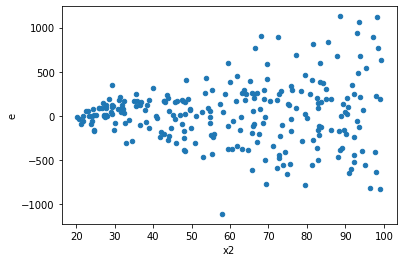

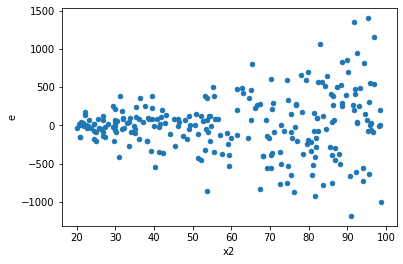

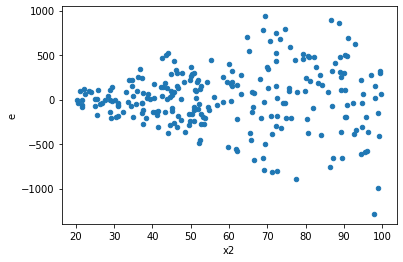

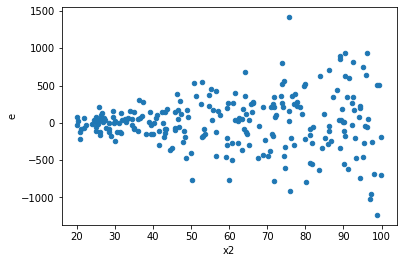

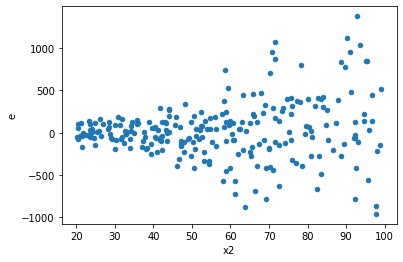

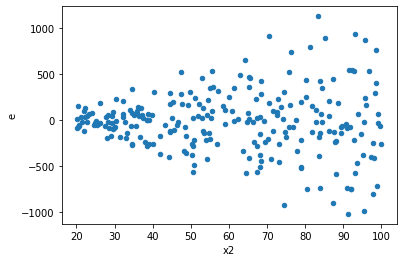

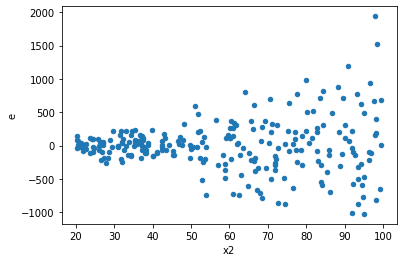

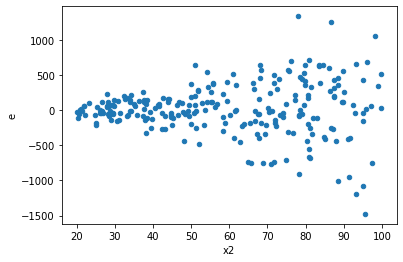

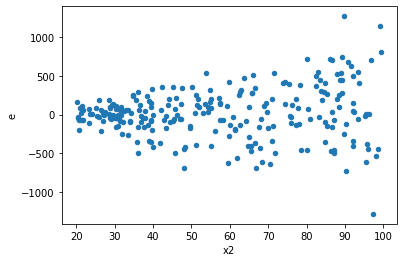

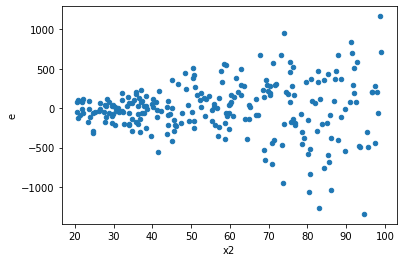

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,98.0,98.0,6321595.911669033,16298538.704640334,64506.08073131666,166311.61943510544,2.57823165738178,4.369960208583379e-06,0.9999978150198957,2.1849801042916894e-06,Reject005=0 : Heteroscedasticity
1.0,98.0,98.0,3976780.17458585,25781368.361617245,40579.38953659031,263075.1873634413,6.482975480107388,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
2.0,98.0,98.0,9925225.236258704,14103691.287242377,101277.80853325209,143915.21721675896,1.4209945821399554,0.08358055382338514,0.9582097230883074,0.04179027691169257,Reject005=1 : Homoscedasticity
3.0,98.0,98.0,2390141.51597597,23855774.50018903,24389.19914261194,243426.27041009214,9.980904620389378,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,98.0,98.0,1510273.2815950275,20116289.97510361,15410.951853010485,205268.26505207765,13.319635737618574,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,98.0,98.0,4402304.963104594,17115495.79334252,44921.47921535299,174647.91625859714,3.8878487376013884,9.753531315936925e-11,0.9999999999512323,4.8767656579684626e-11,Reject005=0 : Heteroscedasticity
6.0,98.0,98.0,1370369.7781741293,29353635.35630952,13983.365083409482,299526.89139091346,21.420229651751434,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,98.0,98.0,10021140.793992573,17344384.469465192,102256.53871420994,176983.51499454278,1.7307794417839857,0.007108486345515086,0.9964457568272425,0.003554243172757543,Reject005=0 : Heteroscedasticity
8.0,98.0,98.0,3335472.7774240165,17752592.488788098,34035.4365043267,181148.90294681734,5.3223616780642455,4.6629367034256575e-15,0.9999999999999977,2.3314683517128287e-15,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,6321595.911669033,16298538.704640334,64506.08073131666,166311.61943510544,2.57823165738178,4.369960208583379e-06,Reject005=0 : Heteroscedasticity
1.0,98.0,98.0,3976780.17458585,25781368.361617245,40579.38953659031,263075.1873634413,6.482975480107388,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,98.0,98.0,9925225.236258704,14103691.287242377,101277.80853325209,143915.21721675896,1.4209945821399554,0.08358055382338514,Reject005=1 : Homoscedasticity
3.0,98.0,98.0,2390141.51597597,23855774.50018903,24389.19914261194,243426.27041009214,9.980904620389378,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,98.0,98.0,1510273.2815950275,20116289.97510361,15410.951853010485,205268.26505207765,13.319635737618574,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,98.0,98.0,4402304.963104594,17115495.79334252,44921.47921535299,174647.91625859714,3.8878487376013884,9.753531315936925e-11,Reject005=0 : Heteroscedasticity
6.0,98.0,98.0,1370369.7781741293,29353635.35630952,13983.365083409482,299526.89139091346,21.420229651751434,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,98.0,98.0,10021140.793992573,17344384.469465192,102256.53871420994,176983.51499454278,1.7307794417839857,0.007108486345515086,Reject005=0 : Heteroscedasticity
8.0,98.0,98.0,3335472.7774240165,17752592.488788098,34035.4365043267,181148.90294681734,5.3223616780642455,4.6629367034256575e-15,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    838
Reject005=1 : Homoscedasticity      162
Name: Result_test, dtype: int64